In [1383]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [1588]:
# AVMN
pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1080_100%.npy")
true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1080_100%.npy")
# pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1081_50%.npy")
# true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1081_50%.npy")
# pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1082_20%.npy")
# true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1082_20%.npy")
# #pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1083_10%.npy")
# #true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1083_10%.npy")
# pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1087_10%.npy")
# true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1087_10%.npy")
# pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1084_5%.npy")
# true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1084_5%.npy")
# #pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1088_5%.npy")
# #true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1088_5%.npy")
# #pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1085_1%.npy")
# #true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1085_1%.npy")
# pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1089_1%.npy")
# true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1089_1%.npy")
# pred = np.load("outputs/y_pred0_nyc_taxi_presampled_accvnet1086_0.15%.npy")
# true = np.load("outputs/y_true0_nyc_taxi_presampled_accvnet1086_0.15%.npy")

# only for AVMN (de-padding)
pred = pred[:,1:-1,:,:]
true = true[:,1:-1,:,:]

# TGNet
# pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1062_10%.npy")
# true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1062_10%.npy")
# #pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1071_10%.npy")
# #true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1071_10%.npy")
# pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1072_50%.npy")
# true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1072_50%.npy")
# pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1073_100%.npy")
# true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1073_100%.npy")
# pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1074_20%.npy")
# true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1074_20%.npy")
# pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1075_5%.npy")
# true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1075_5%.npy")
# pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1076_1%.npy")
# true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1076_1%.npy")
pred = np.load("outputs/y_pred_nyc_taxi_presampled_tgnet1077_0.15%.npy")
true = np.load("outputs/y_true_nyc_taxi_presampled_tgnet1077_0.15%.npy")

In [1581]:
# # only for AVMN
# pred = pred[:,1:-1,:,:]
# true = true[:,1:-1,:,:]

In [1589]:
pred.shape, true.shape#, true_org.shape

((4350, 10, 20, 1), (4350, 10, 20, 1))

In [1592]:
def rmse_vol(y_true, y_pred):
    y_true = y_true[:,:,:,0]
    y_pred = y_pred[:,:,:,0]
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

def rmse_c2c(y_true, y_pred):
    y_true = y_true[:,:,:,1]
    y_pred = y_pred[:,:,:,1]
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

def smape_vol(y_true, y_pred):
    y_true = y_true[:,:,:,0]
    y_pred = y_pred[:,:,:,0]
#     smape = np.mean(np.abs(y_true - y_pred) / (np.abs(y_true)+np.abs(y_pred)+1e-7))
    smape = np.mean(np.abs(y_true - y_pred) / (np.abs(y_true)+np.abs(y_pred)+1e-7))
    return smape

def mape_vol(y_true, y_pred):
    y_true = y_true[:,:,:,0]
    y_pred = y_pred[:,:,:,0]
#     mape = np.mean((np.abs(y_true - y_pred)+1) / (np.abs(y_true)+1))
    mape = np.mean(np.abs(y_true - y_pred) / (np.abs(y_true)+1))
#     mape = np.mean(np.abs((y_true - y_pred)[y_true!=0]) / np.abs(y_true[y_true!=0]))
    return mape

def smape_c2c(y_true, y_pred):
    y_true = y_true[:,:,:,1]
    y_pred = y_pred[:,:,:,1]
    smape = np.mean(np.abs(y_true - y_pred) / (np.abs(y_true)+np.abs(y_pred)+1e-7))
    return smape

np.finfo(float).eps

2.220446049250313e-16

In [1560]:
thrs = 10 #1 #3 #5 #8 #10
def masked_smape_vol(y_true, y_pred):
#     true_mask = y_pred[y_pred >= thrs]
    true_mask = y_pred >= thrs
#     print(true_mask.shape, true_mask.dtype)
#     print(np.abs(y_pred-y_true)[true_mask].shape, (np.abs(y_true)+np.abs(y_pred))[true_mask].shape)
#     print(np.divide(np.abs(y_pred-y_true)[true_mask], (np.abs(y_true)+np.abs(y_pred))[true_mask]).shape)
    masked_smape = np.mean(np.divide(np.abs(y_pred-y_true)[true_mask], (np.abs(y_true)+np.abs(y_pred))[true_mask]))
    return masked_smape

pred: -2.5325186 24.729721


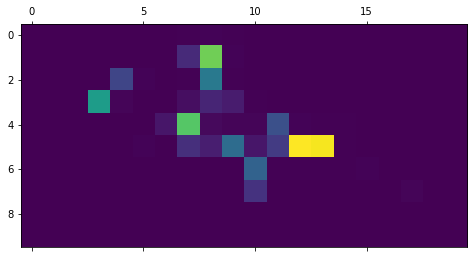

true: 0.0 47.0


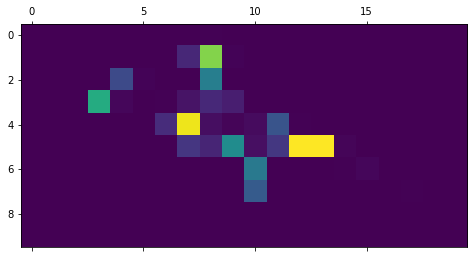

In [1590]:
print("pred:", np.amin(pred[:,:,:,0]), np.amax(pred[:,:,:,0]))
plt.matshow(np.std(pred[:,:,:,0], axis=0))
plt.show()
print("true:", np.amin(true[:,:,:,0]), np.amax(true[:,:,:,0]))
plt.matshow(np.std(true[:,:,:,0], axis=0))
plt.show()

In [1593]:
rmse_vol(true, pred), smape_vol(true, pred), masked_smape_vol(true, pred), mape_vol(true, pred) #rmse_c2c(true, pred), smape_c2c(true, pred)

(0.31998977, 0.99823093, 0.3710003, 0.011477662)

In [1575]:
loc = (5,12) #(5+1,12) #(5,12) #(5+1,12) #(5,12) #(5,10) #(8,11)
a = pred[:,loc[0],loc[1],0]
b = true[:,loc[0],loc[1],0]
# b = true_org[:,loc[0],loc[1],0] / 100
# c = pred[:,loc[0],loc[1],1]
# d = true[:,loc[0],loc[1],1]

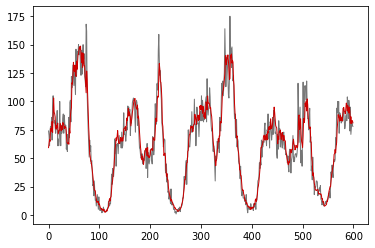

In [1576]:
# AVMN
offset = 210-30 #1300 #2000 #3000 #1000 #1000 #0 #24 #288*5 #288*4+2016 #288*6 #8000 #20000 #12500 #20000 #46000
duration = 600 #144*2 #144*2 #2016 #1000 #288 #3000 #10000 #1440 #10000 #2500 #10000 #200 #10000 #3000 #1000
fr = offset
to = offset+duration
plt.plot(b[fr:to], color='#777777', linewidth=1)
plt.plot(a[fr:to], color='#CC0000', linewidth=1)#, marker='o')
# plt.plot(d[fr:to], color='g')
# plt.plot(c[fr:to], color='c')

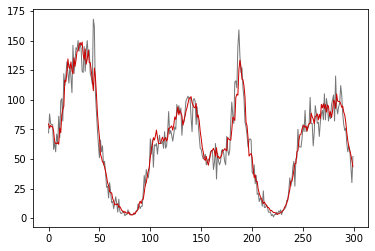

In [1577]:
#TGNet
offset = 210 #1300 #2000 #3000 #1000 #1000 #0 #24 #288*5 #288*4+2016 #288*6 #8000 #20000 #12500 #20000 #46000
duration = 300 #144*2 #144*2 #2016 #1000 #288 #3000 #10000 #1440 #10000 #2500 #10000 #200 #10000 #3000 #1000
fr = offset
to = offset+duration
plt.plot(b[fr:to], color='#777777', linewidth=1)#, linestyle='dashed')
plt.plot(a[fr:to], color='#CC0000', linewidth=1)#, linestyle='dashed')
# plt.plot(d[fr:to], color='g')
# plt.plot(c[fr:to], color='c')

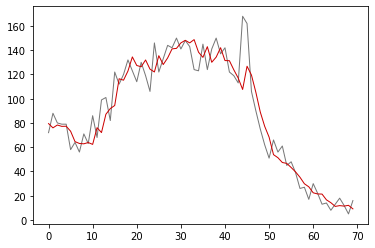

In [1578]:
# AVMN detail
offset = 210 #1300 #2000 #3000 #1000 #1000 #0 #24 #288*5 #288*4+2016 #288*6 #8000 #20000 #12500 #20000 #46000
duration = 70 #144*2 #144*2 #2016 #1000 #288 #3000 #10000 #1440 #10000 #2500 #10000 #200 #10000 #3000 #1000
fr = offset
to = offset+duration
plt.plot(b[fr:to], color='#777777', linewidth=1)#, linestyle='dashed')
plt.plot(a[fr:to], color='#CC0000', linewidth=1)#, linestyle='dashed')
# plt.plot(d[fr:to], color='g')
# plt.plot(c[fr:to], color='c')

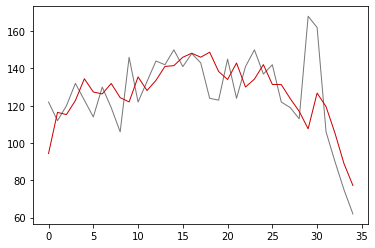

In [1579]:
#TGNet detail
offset = 210+15 #225 #1300 #2000 #3000 #1000 #1000 #0 #24 #288*5 #288*4+2016 #288*6 #8000 #20000 #12500 #20000 #46000
duration = 35 #35 #144*2 #144*2 #2016 #1000 #288 #3000 #10000 #1440 #10000 #2500 #10000 #200 #10000 #3000 #1000
fr = offset
to = offset+duration
plt.plot(b[fr:to], color='#777777', linewidth=1)#, linestyle='dashed')
plt.plot(a[fr:to], color='#CC0000', linewidth=1)#, linestyle='dashed')
# plt.plot(d[fr:to], color='g')
# plt.plot(c[fr:to], color='c')

In [676]:
pred = np.load("outputs/y_pred1_nyc_taxi_presampled_accvnet01.npy")
true = np.load("outputs/y_true1_nyc_taxi_presampled_accvnet01.npy")
pred.shape, true.shape

((5400, 57), (5400, 57))

In [677]:
def temporal_enc_to_date(vec):
    tod = np.argmax(vec[0:48])
    dow = np.argmax(vec[48:55])
    holiday = vec[55]
    holiday_soon = vec[56]
    print(tod, dow, holiday, holiday_soon)

In [678]:
i = 1900
temporal_enc_to_date(pred[i])
temporal_enc_to_date(true[i])

25 4 57.846954 0.0
29 6 0.0 1.0
